<a href="https://colab.research.google.com/github/amrahmani/Marketing/blob/main/AIMarketing_Ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Dataset**

**Delete rows with Negative Quantity and UnitPrice**

**Identify Missing Values**

**Impute Missing Values**

**Remove Rows or Columns with High Missing Percentaget**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Load the dataset
df = pd.read_csv('./data/OnlineRetail.csv', encoding='ISO-8859-1')

print("--- Analysis of my_data DataFrame ---")
print(df.head())
print(df.info())

print("Original DataFrame Shape:", df.shape)

# Summary Statistics
print(df.describe())

# 2- Identify records with negative Quantity and UnitPrice
negative_qty_price_mask = (df['Quantity'] < 0) | (df['UnitPrice'] < 0)
negative_qty_price_count = negative_qty_price_mask.sum()

print(f"\nNumber of records with negative Quantity and UnitPrice: {negative_qty_price_count}")

# Delete rows with negative Quantity and UnitPrice
df_cleaned = df[~negative_qty_price_mask].copy()

print("Shape of DataFrame after deleting negative Quantity and UnitPrice rows:", df_cleaned.shape)

# --- Continue with the original data cleaning steps on the cleaned DataFrame ---

# Summary Statistics
print(df_cleaned.describe())

# 3- Identify Missing Values
print("\n--- 1. Missing Values in Cleaned DataFrame ---\n")
print(df_cleaned.isnull().sum())
initial_missing_count_cleaned = df_cleaned.isnull().sum().sum()
print(f"\nTotal missing values in cleaned DataFrame: {initial_missing_count_cleaned}")

# 2- Impute Missing Values with Mean (UnitPrice)
print("\n--- 2. Imputing Missing Values (UnitPrice) in Cleaned DataFrame ---\n")
print("Rows with missing UnitPrice before imputation:")
print(df_cleaned[df_cleaned['UnitPrice'].isnull()])

mean_unit_price_cleaned = df_cleaned['UnitPrice'].mean()
df_cleaned['UnitPrice'].fillna(mean_unit_price_cleaned, inplace=True)

print("\nRows with missing UnitPrice after imputation:")
print(df_cleaned[df_cleaned['UnitPrice'].isnull()])
print("\nMissing values after UnitPrice imputation:")
print(df_cleaned.isnull().sum())

# 4- Remove rows or columns with a high percentage of missing values (> 50%)
print("\n--- 3. Removing Rows/Columns with High Missing Percentage (> 50%) in Cleaned DataFrame ---\n")

# Check column-wise missing percentage
column_missing_percentage_cleaned = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
columns_to_drop_cleaned = column_missing_percentage_cleaned[column_missing_percentage_cleaned > 50].index
print("Columns with > 50% missing values:", columns_to_drop_cleaned)

if not columns_to_drop_cleaned.empty:
    print("\nDataFrame info before dropping columns:")
    df_cleaned.info()
    df_cleaned.drop(columns=columns_to_drop_cleaned, inplace=True)
    print("\nDataFrame info after dropping columns:")
    df_cleaned.info()
else:
    print("\nNo columns found with more than 50% missing values.")

# Check row-wise missing percentage
row_missing_percentage_cleaned = (df_cleaned.isnull().sum(axis=1) / df_cleaned.shape[1]) * 100
rows_to_drop_cleaned = row_missing_percentage_cleaned[row_missing_percentage_cleaned > 50].index
print("\nNumber of rows with > 50% missing values:", len(rows_to_drop_cleaned))

if not rows_to_drop_cleaned.empty:
    print("\nFirst 5 rows with > 50% missing values before dropping:")
    print(df_cleaned.loc[rows_to_drop_cleaned.head()])
    df_cleaned.drop(index=rows_to_drop_cleaned, inplace=True)
    print("\nDataFrame shape after dropping rows:", df_cleaned.shape)
    print("\nFirst 5 rows with > 50% missing values after dropping:")
    # Check if any still exist (should be none)
    remaining_high_missing_rows_cleaned = df_cleaned[(df_cleaned.isnull().sum(axis=1) / df_cleaned.shape[1]) * 100 > 50]
    if not remaining_high_missing_rows_cleaned.empty:
        print(remaining_high_missing_rows_cleaned.head())
    else:
        print("No rows with > 50% missing values remain.")
else:
    print("\nNo rows found with more than 50% missing values.")

print("\nMissing values after handling high percentage missing rows/columns:")
print(df_cleaned.isnull().sum())

--- Analysis of my_data DataFrame ---
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ----

<ipython-input-54-3048b1eb0523>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['UnitPrice'].fillna(mean_unit_price_cleaned, inplace=True)


InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

--- 3. Removing Rows/Columns with High Missing Percentage (> 50%) in Cleaned DataFrame ---

Columns with > 50% missing values: Index([], dtype='object')

No columns found with more than 50% missing values.

Number of rows with > 50% missing values: 0

No rows found with more than 50% missing values.

Missing values after handling high percentage missing rows/columns:
InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64



--- Query 1: Top 5 Most Sold Products ---
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48478
WHITE HANGING HEART T-LIGHT HOLDER    37895
Name: Quantity, dtype: int64

--- Query 2: Average Unit Price per Country ---
Country
Singapore               58.333288
Hong Kong               23.474437
Canada                   6.030331
Portugal                 5.843251
Cyprus                   5.710391
Lebanon                  5.387556
Finland                  5.296993
Norway                   5.282155
EIRE                     4.875849
Malta                    4.867768
European Community       4.830000
Italy                    4.717955
Bahrain                  4.597778
Greece                   4.574414
Channel Islands          4.531618
Brazil                   4.456250
France                   4.399713
RSA                      4.277586
Austria                  4.

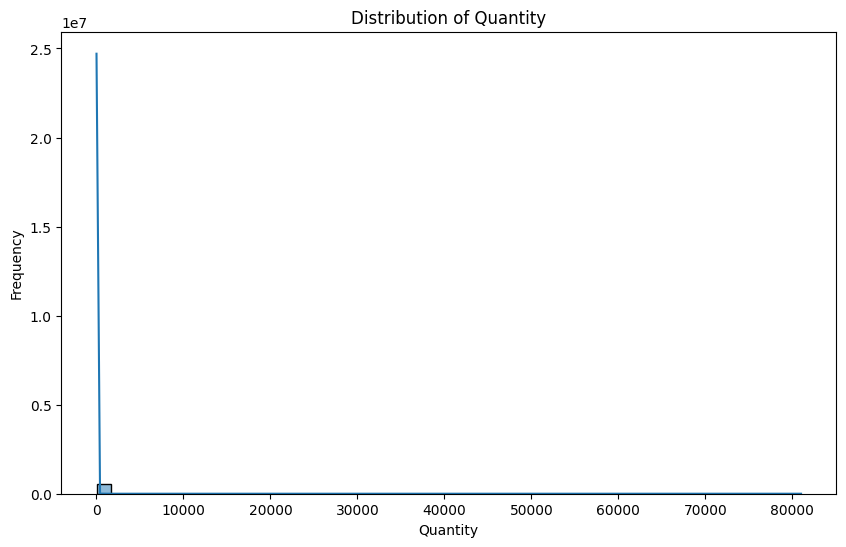


Summary statistics for Quantity:
count    531283.000000
mean         10.655299
std         156.830617
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

--- Query 8: Distribution of UnitPrice ---


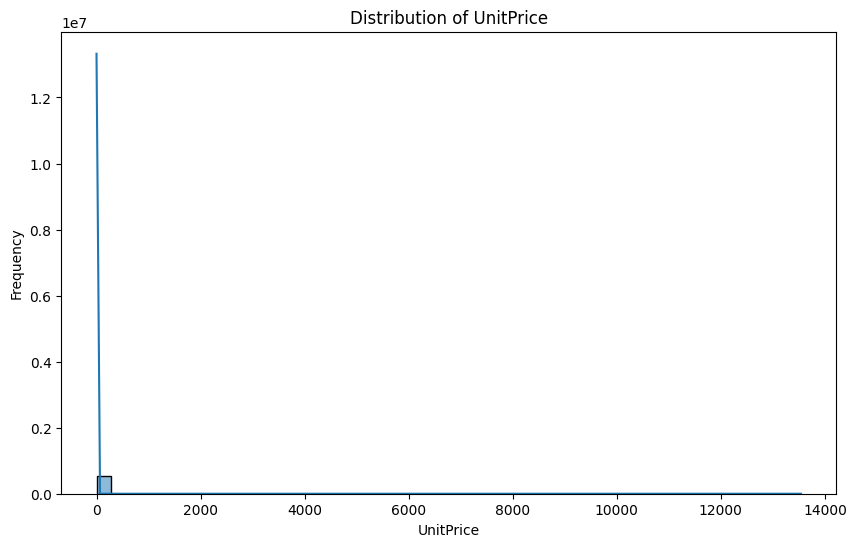


Summary statistics for UnitPrice:
count    531283.000000
mean          3.898954
std          35.876279
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

--- Query 9: Number of Orders per Year ---
InvoiceDate
2010     1629
2011    19097
Name: InvoiceNo, dtype: int64

--- Query 10: Total Revenue per Country ---
Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmar

In [56]:
# Query 1: What are the top 5 most sold products (based on Quantity)?
print("\n--- Query 1: Top 5 Most Sold Products ---")
top_5_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_5_products)

# Query 2: What is the average UnitPrice for each Country?
print("\n--- Query 2: Average Unit Price per Country ---")
average_price_per_country = df_cleaned.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)
print(average_price_per_country)

# Query 3: How many unique customers are there in the dataset?
print("\n--- Query 3: Number of Unique Customers ---")
unique_customers = df_cleaned['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

# Query 4: What is the total revenue generated? (Revenue = Quantity * UnitPrice)
print("\n--- Query 4: Total Revenue Generated ---")
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
total_revenue = df_cleaned['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

# Query 5: Which country has the highest number of orders (based on InvoiceNo)?
print("\n--- Query 5: Country with the Highest Number of Orders ---")
orders_per_country = df_cleaned.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
highest_order_country = orders_per_country.index[0]
number_of_orders = orders_per_country.iloc[0]
print(f"Country with the highest number of orders: {highest_order_country} (Number of orders: {number_of_orders})")

# Query 6: What are the top 10 most frequent StockCodes?
print("\n--- Query 6: Top 10 Most Frequent StockCodes ---")
top_10_stockcodes = df_cleaned['StockCode'].value_counts().nlargest(10)
print(top_10_stockcodes)

# Query 7: Analyze the distribution of Quantity.
print("\n--- Query 7: Distribution of Quantity ---")
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

print("\nSummary statistics for Quantity:")
print(df_cleaned['Quantity'].describe())

# Query 8: Analyze the distribution of UnitPrice.
print("\n--- Query 8: Distribution of UnitPrice ---")
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

print("\nSummary statistics for UnitPrice:")
print(df_cleaned['UnitPrice'].describe())

# Query 9: How many orders were made in each year?
print("\n--- Query 9: Number of Orders per Year ---")
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
orders_per_year = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.year)['InvoiceNo'].nunique()
print(orders_per_year)

# Query 10: What is the total revenue per country?
print("\n--- Query 10: Total Revenue per Country ---")
revenue_per_country = df_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print(revenue_per_country)